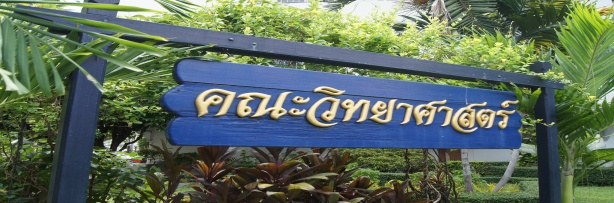

### <span style='color:lightgreen;'>Histogram Equalization</span>
<b>Histogram Equalization</b> is a technique used to improve the contrast of an image by redistributing the intensity values of the image. The basic idea is to spread out the most frequent intensity values to make the histogram of the resulting image flatter, thus enhancing the overall contrast.

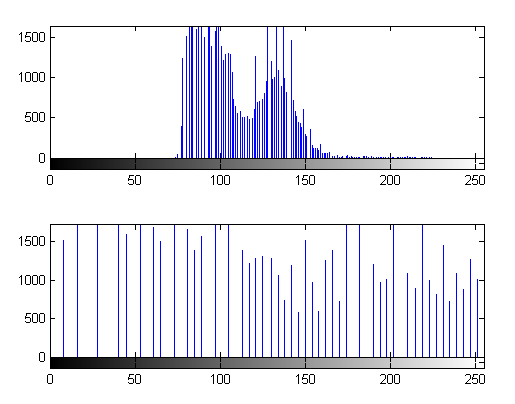


Here's a more detailed explanation:




#### <span style='color:lightblue;'>Step-by-Step Explanation</span>  
1. **<span style='color:lightgreen;'>Read an Image:</span>**
    - The first step is to calculate the histogram of the image. The histogram represents the frequency of each intensity level in the image.

In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [39]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [40]:
gamma = 0.4
c = 255.0

In [41]:
img = cv2.imread('./images/lows.jpg', 0)
img_norm = img.astype(np.float16)
print(np.amax(img_norm))
img_norm = img_norm/np.amax(img_norm) 

201.0


In [42]:
gamma_img = (img_norm**gamma)*c
gamma_img = gamma_img.astype(np.uint8) 

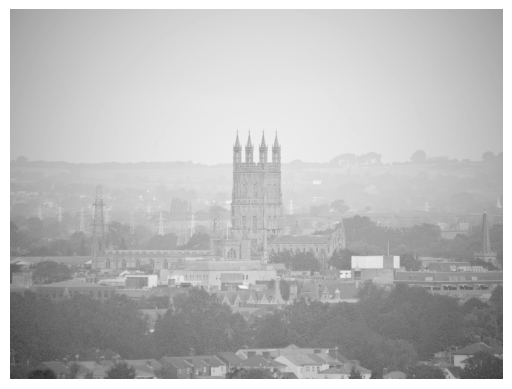

In [43]:
muls = cv2.hconcat([img, gamma_img])
ShowImage(gamma_img)

In [44]:
hist_0 = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_1 = cv2.calcHist([gamma_img], [0], None, [256], [0, 256])

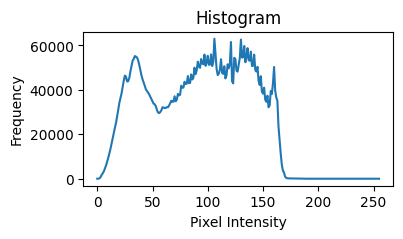

In [45]:
plt.figure(figsize=(4,2))
plt.plot(hist_0)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
# plt.savefig('

2. **<span style='color:lightgreen;'>Histogram Calculation:</span>**
    - The first step is to calculate the histogram of the image. The histogram represents the frequency of each intensity level in the image.

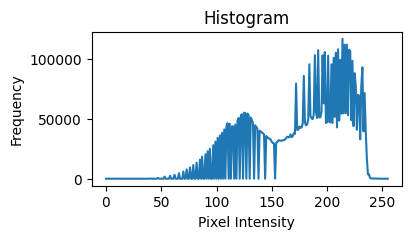

In [46]:
plt.figure(figsize=(4,2))
plt.plot(hist_1)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
# plt.savefig('

In [47]:
hist, bins = np.histogram(gamma_img.flatten(), 256, [0,256])
print(hist.shape)

(256,)


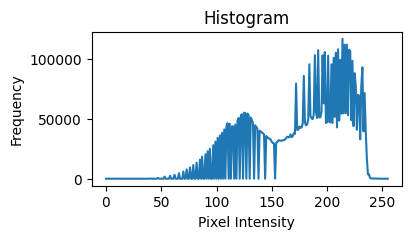

In [48]:
plt.figure(figsize=(4,2))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

3. **<span style='color:lightgreen;'>Cumulative Distribution Function (CDF):</span>**
    - The cumulative distribution function is computed from the histogram. The CDF is a cumulative sum of the histogram values, which helps to map the original pixel values to new intensity values based on their cumulative probability.

In [49]:
cdf = hist.cumsum()


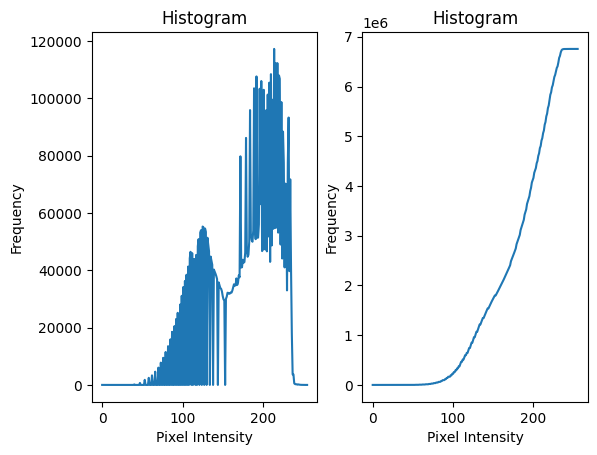

In [50]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

fig.add_subplot(1, 2, 2)
plt.plot(cdf)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

4. **<span style='color:lightgreen;'>Mapping the Intensity Values:</span>**
    - The original intensity values are then mapped to new intensity values using the CDF. The goal is to redistribute the pixel values to cover a wider range of intensities.

In [51]:
cdf_m = np.ma.masked_equal(cdf, 0) 
cdf_m = ((cdf_m - cdf_m.min())  / (cdf_m.max() - cdf_m.min()))*255

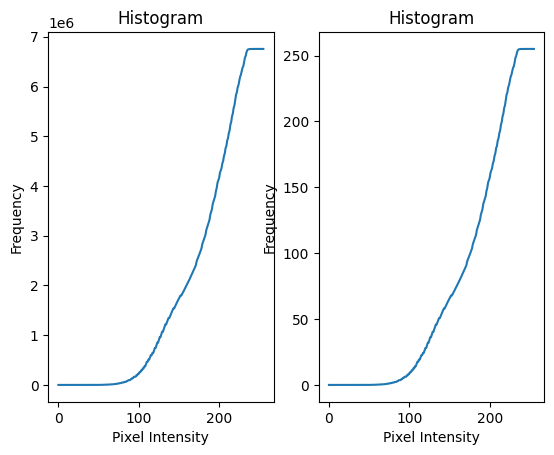

In [52]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.plot(cdf)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

fig.add_subplot(1, 2, 2)
plt.plot(cdf_m)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

In [53]:

cdf_m = np.ma.filled(cdf_m, 0).astype('uint8')  

In [54]:
equalized_image = cdf_m[gamma_img]

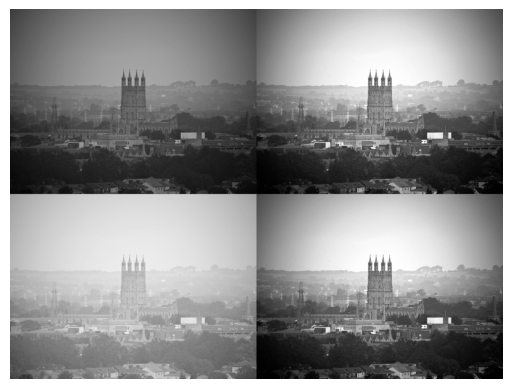

In [56]:
muls_0 = cv2.hconcat([img, equalized_image])
muls_1 = cv2.hconcat([gamma_img, equalized_image])
muls = cv2.vconcat([muls_0, muls_1])

ShowImage(muls)

In [57]:
cv2.imshow("Results", equalized_image)
cv2.waitKey()
cv2.destroyAllWindows()

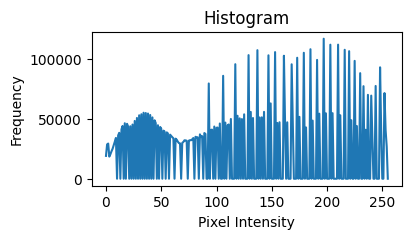

In [58]:
hist_equ, bins = np.histogram(equalized_image.flatten(), 256, [0,256])
plt.figure(figsize=(4,2))
plt.plot(hist_equ)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()